<a href="https://colab.research.google.com/github/jane-mystika/AI_regular_tasks/blob/main/Day08_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [11]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8680 - loss: 0.4680 - val_accuracy: 0.9655 - val_loss: 0.1261
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9601 - loss: 0.1357 - val_accuracy: 0.9707 - val_loss: 0.1000
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9733 - loss: 0.0901 - val_accuracy: 0.9753 - val_loss: 0.0828
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0588 - val_accuracy: 0.9783 - val_loss: 0.0707
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9857 - loss: 0.0448 - val_accuracy: 0.9755 - val_loss: 0.0817


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.1021
Test Accuracy: 0.9745000004768372


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

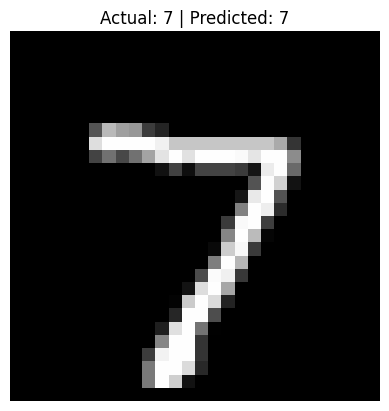

In [16]:
predictions = model.predict(x_test)

index = 0
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Actual: {y_test[index]} | Predicted: {np.argmax(predictions[index])}")
plt.axis('off')


In [17]:
model.save("digit_model.h5")
